In [19]:
# Install yfinance (only needed once)
!pip install yfinance


In [20]:
# 📚 Step 2: Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
# 🎯 Step 3: Define the ETFs for Stocks, Bonds, and Cash
etfs = {
    'Stocks': 'VTI',       # Vanguard Total US Stock Market ETF
    'Bonds': 'AGG',        # iShares Core US Aggregate Bond ETF
    'Cash': 'BIL'          # SPDR Bloomberg 1-3 Month T-Bill ETF
}


In [22]:
# ⏬ Step 4: Download historical closing price data (2020–2025)
data = yf.download(list(etfs.values()), start="2020-01-01", end="2025-01-01")

# Extract only the 'Close' prices for each ETF
data = data['Close']

# Rename the columns to match asset class names
data.columns = etfs.keys()

# Drop any missing values
data = data.dropna()

# Preview the data
data.head()


/tmp/ipython-input-324585381.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(etfs.values()), start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  3 of 3 completed


,Stocks,Bonds,Cash
Date,,,
2020-01-02,96.627007,79.532425,151.909653
2020-01-03,96.910011,79.532425,150.942825
2020-01-06,96.832825,79.523705,151.458466
2020-01-07,96.729942,79.523705,151.099380
2020-01-08,96.618462,79.541107,151.845200


In [23]:
# 💸 Step 5: Normalize prices to simulate starting investment of $100
normalized = data / data.iloc[0] * 100
normalized.head()


,Stocks,Bonds,Cash
Date,,,
2020-01-02,100.000000,100.000000,100.000000
2020-01-03,100.292884,100.000000,99.363551
2020-01-06,100.213003,99.989035,99.702990
2020-01-07,100.106529,99.989035,99.466609
2020-01-08,99.991157,100.010917,99.957571


In [24]:
# 🧾 Step 6: Define portfolio allocations for different risk profiles
allocations = {
    'Conservative': {'Stocks': 0.2, 'Bonds': 0.7, 'Cash': 0.1},
    'Balanced': {'Stocks': 0.5, 'Bonds': 0.4, 'Cash': 0.1},
    'Aggressive': {'Stocks': 0.8, 'Bonds': 0.15, 'Cash': 0.05}
}


In [25]:
# 📈 Step 7: Simulate portfolio performance
portfolio_values = pd.DataFrame(index=normalized.index)

for profile, weights in allocations.items():
    portfolio_values[profile] = sum(normalized[asset] * weight for asset, weight in weights.items())

portfolio_values.head()


,Conservative,Balanced,Aggressive
Date,,,
2020-01-02,100.000000,100.000000,100.000000
2020-01-03,99.994932,100.082797,100.202485
2020-01-06,100.005224,100.072415,100.153907
2020-01-07,99.960292,99.995540,100.056909
2020-01-08,100.001630,99.995702,99.992442


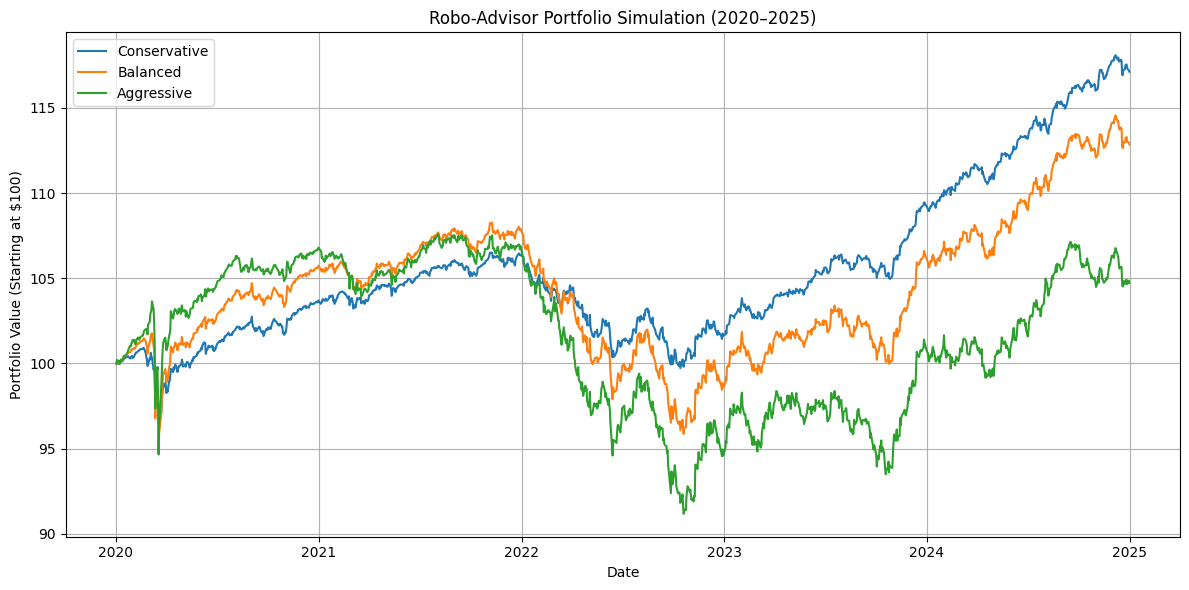

In [26]:
# 📊 Step 8: Plot the portfolio growth over time
plt.figure(figsize=(12, 6))
for profile in portfolio_values.columns:
    plt.plot(portfolio_values.index, portfolio_values[profile], label=profile)

plt.title("Robo-Advisor Portfolio Simulation (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Starting at $100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# 📋 Step 9: Show final portfolio values on the last date
portfolio_values.tail(1).T.rename(columns={portfolio_values.tail(1).columns[0]: "Final Value"})


Date,2024-12-31
Conservative,117.129229
Balanced,112.862946
Aggressive,104.732005
